In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
df=pd.read_csv('/content/drive/MyDrive/mushrooms.csv')
df1=df
df2=df
df3=df

In [ ]:
print(df.head().T)
print(df.columns) #transpose index and columns(Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. The property T is an accessor to the method transpose().)

                          0  1  2  3  4
class                     p  e  e  p  e
cap-shape                 x  x  b  x  x
cap-surface               s  s  s  y  s
cap-color                 n  y  w  w  g
bruises                   t  t  t  t  f
odor                      p  a  l  p  n
gill-attachment           f  f  f  f  f
gill-spacing              c  c  c  c  w
gill-size                 n  b  b  n  b
gill-color                k  k  n  n  k
stalk-shape               e  e  e  e  t
stalk-root                e  c  c  e  e
stalk-surface-above-ring  s  s  s  s  s
stalk-surface-below-ring  s  s  s  s  s
stalk-color-above-ring    w  w  w  w  w
stalk-color-below-ring    w  w  w  w  w
veil-type                 p  p  p  p  p
veil-color                w  w  w  w  w
ring-number               o  o  o  o  o
ring-type                 p  p  p  p  e
spore-print-color         k  n  n  k  n
population                s  n  n  s  a
habitat                   u  g  m  u  g
Index(['class', 'cap-shape', 'cap-surfac

In [ ]:
print("total no. of columns = ",df.shape[1]);
print("total no. of rows = ",df.shape[0]);

total no. of columns =  23
total no. of rows =  8124


EXPLORATORY DATA ANALYSIS --> In this part, exploratory data analysis which will performed by going through investigating features to see how data is distributed, unique values, and if there are any missings values.

In [ ]:
M_cols=df.columns.to_list()
print(M_cols)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


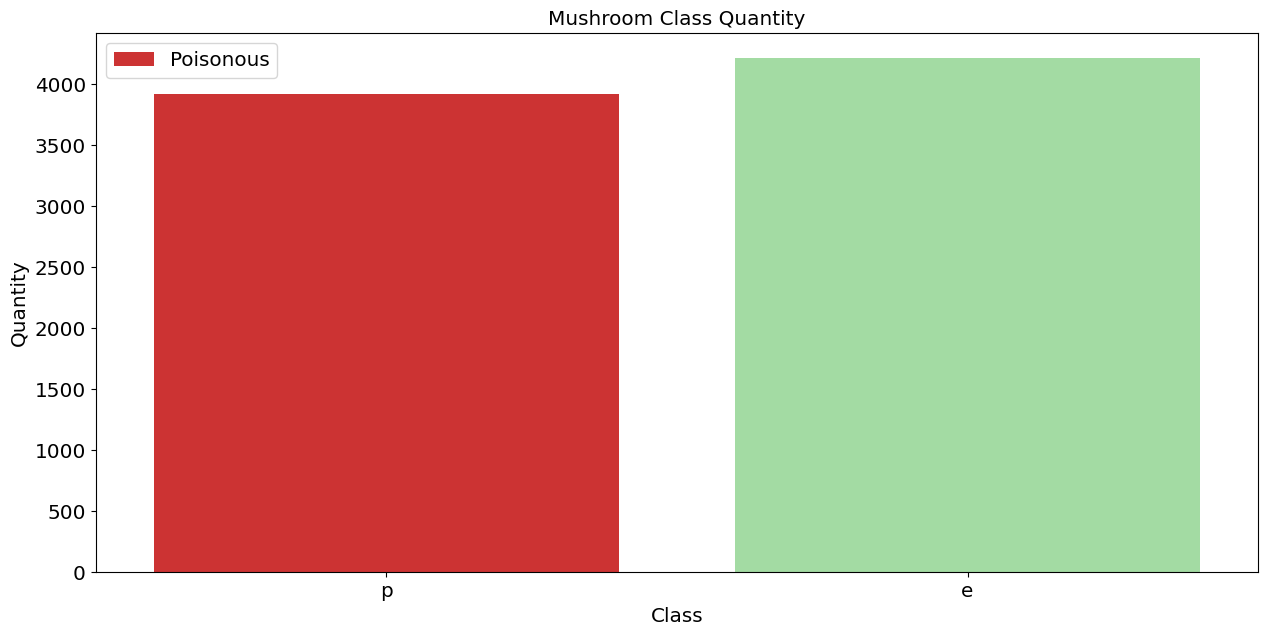

In [ ]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(x=col, hue=hue, palette=color, saturation=0.6, data=df, dodge=True, ax=ax)
    ax.set(title=f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels is not None:
        ax.legend(labels, loc=0)
    plt.show()
class_labels = ['Poisonous', 'Edible']
plot_col(col='class', labels=class_labels)


<ipython-input-10-95248e15a260>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(30,20))


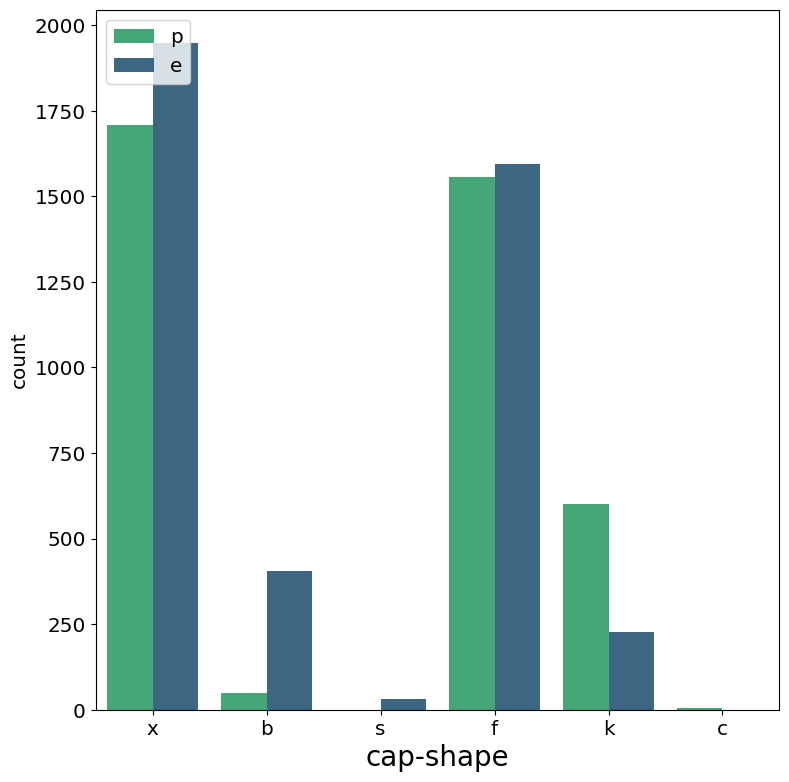

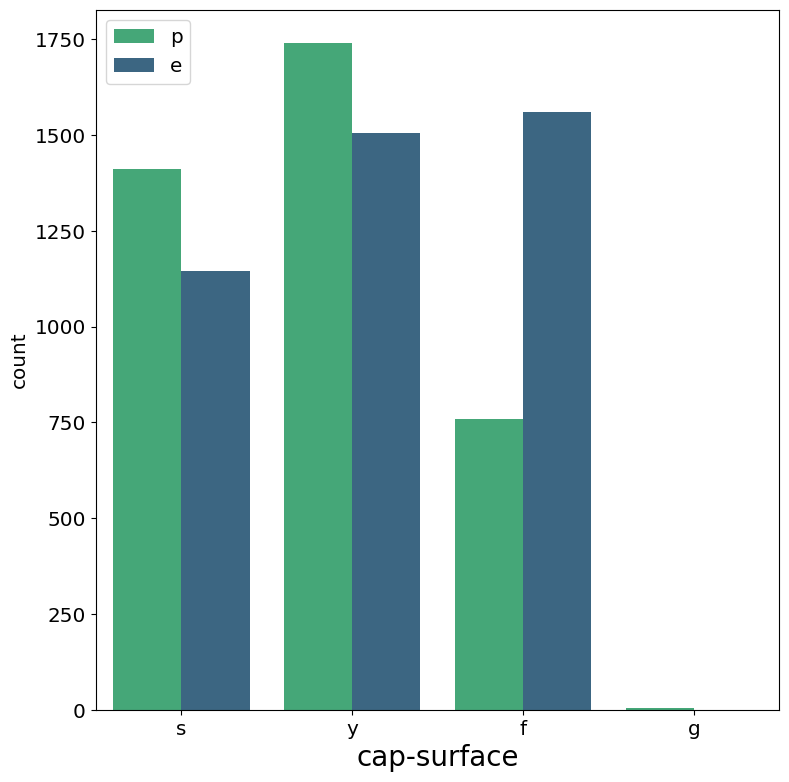

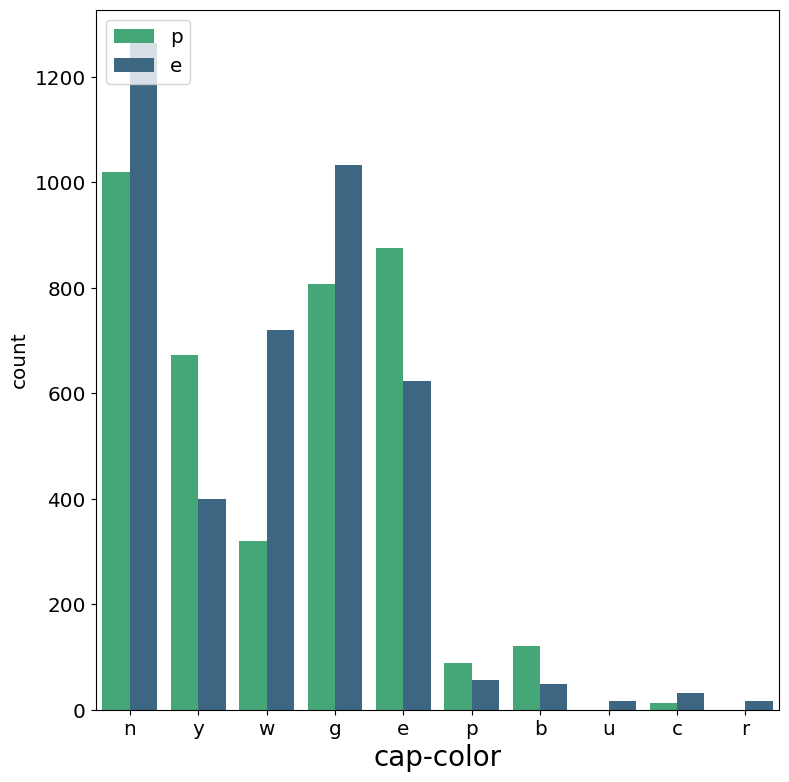

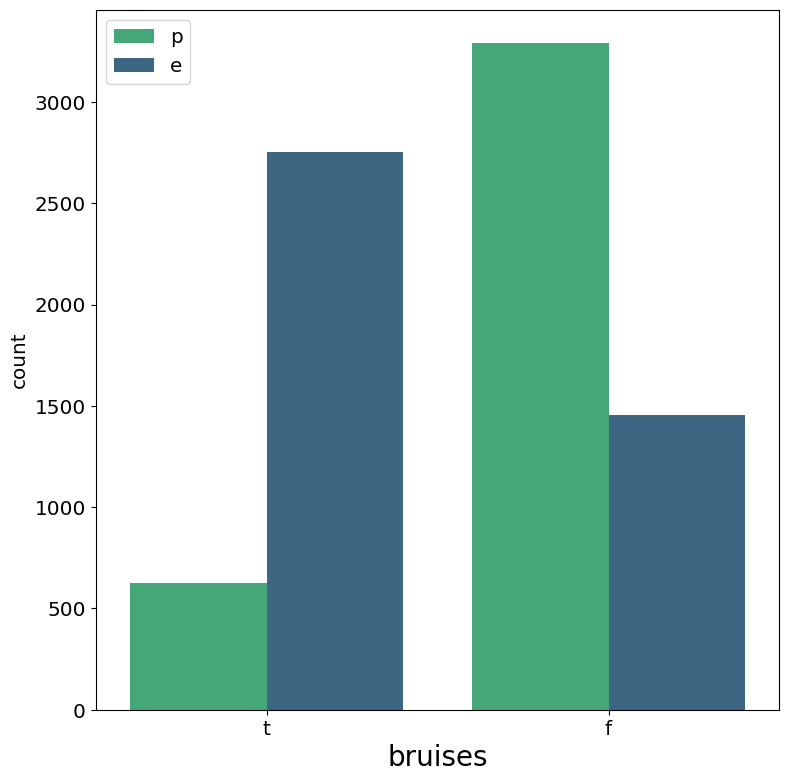

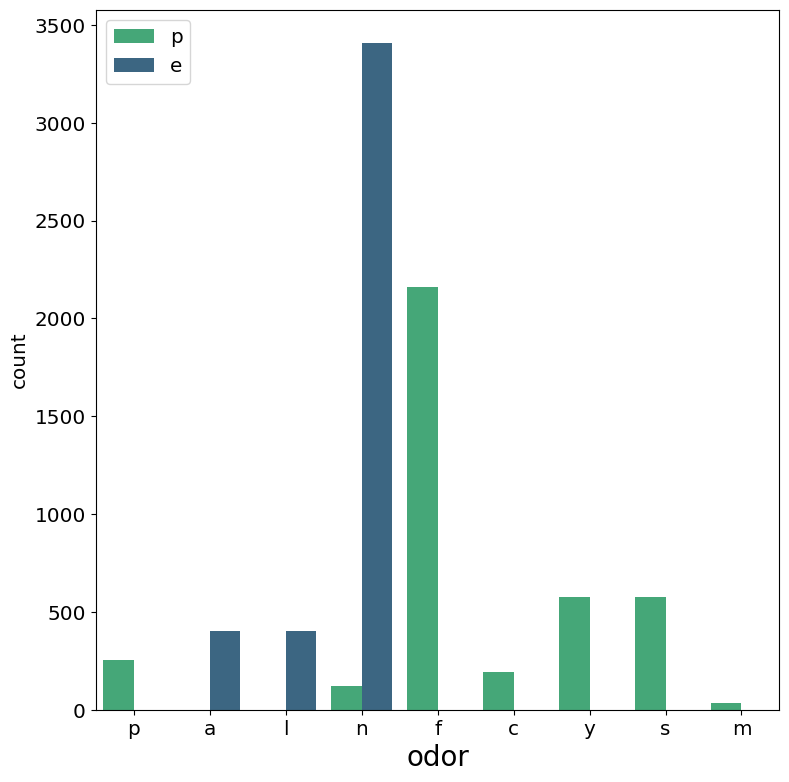

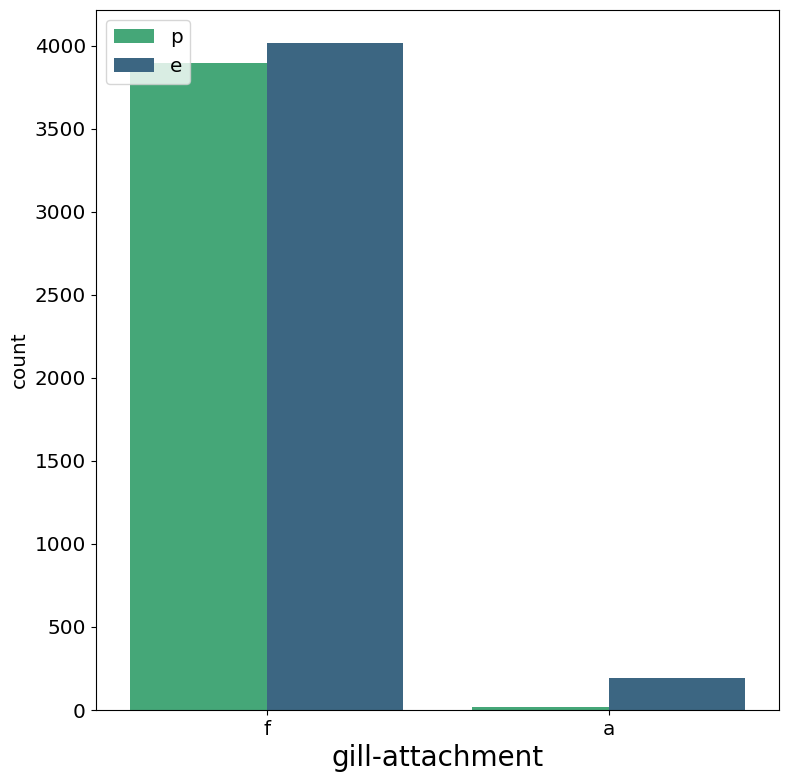

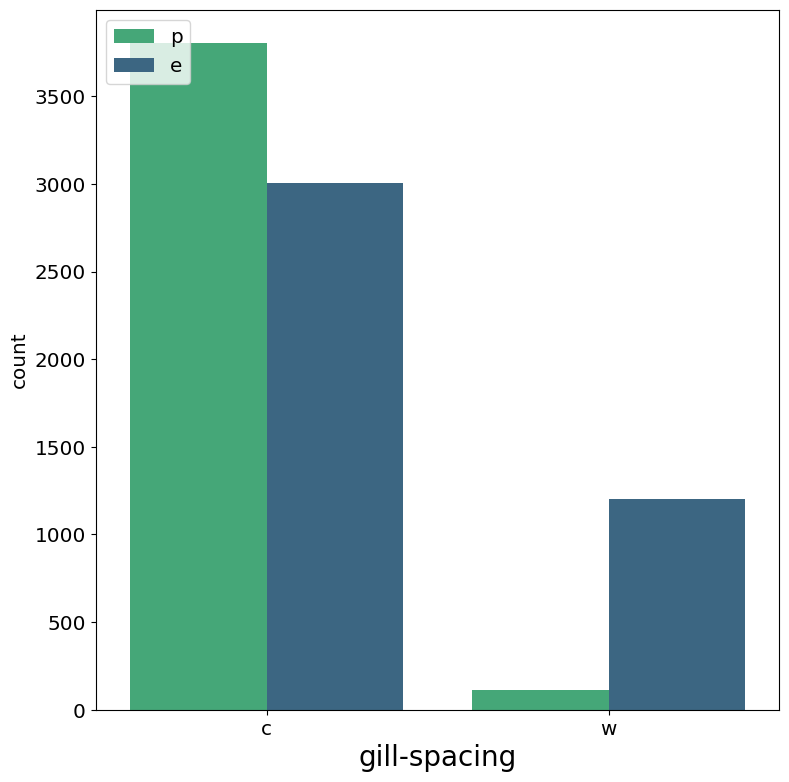

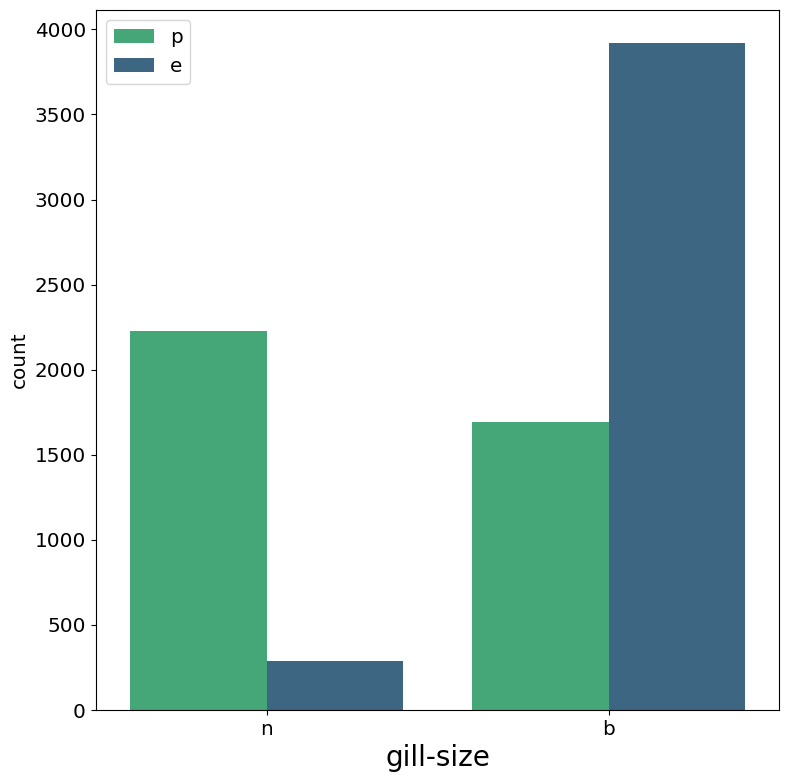

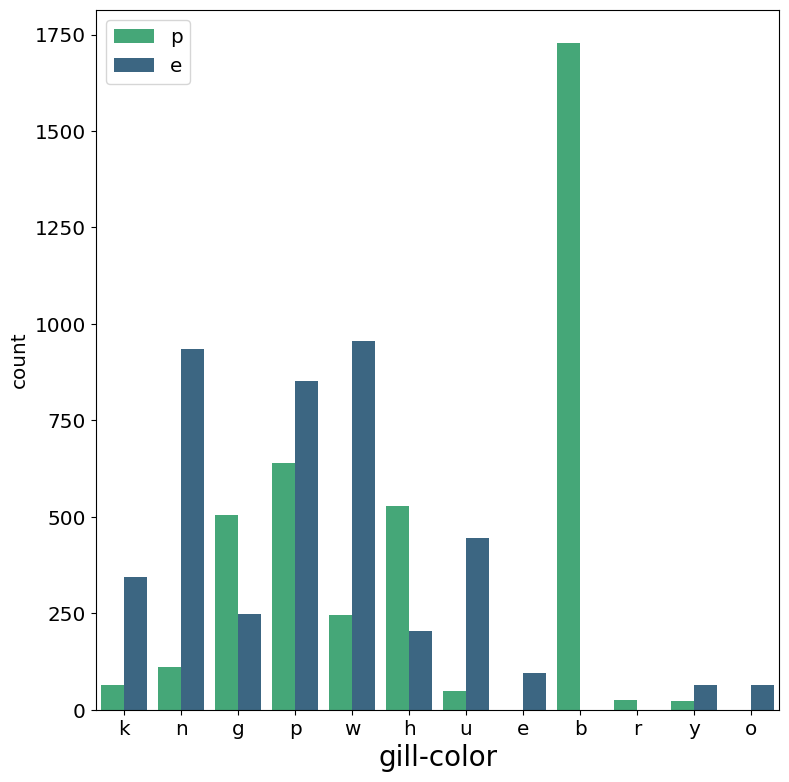

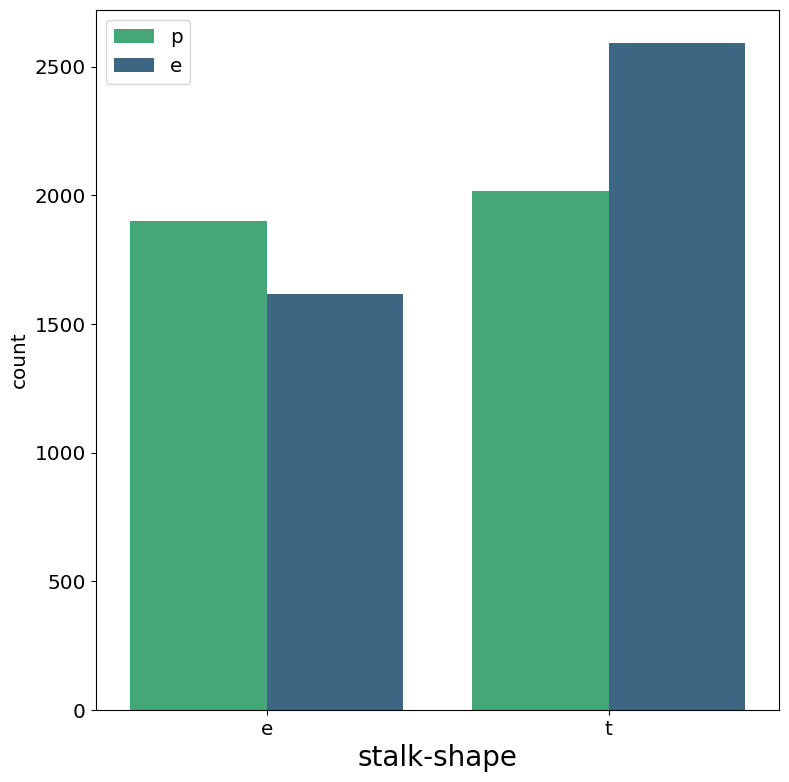

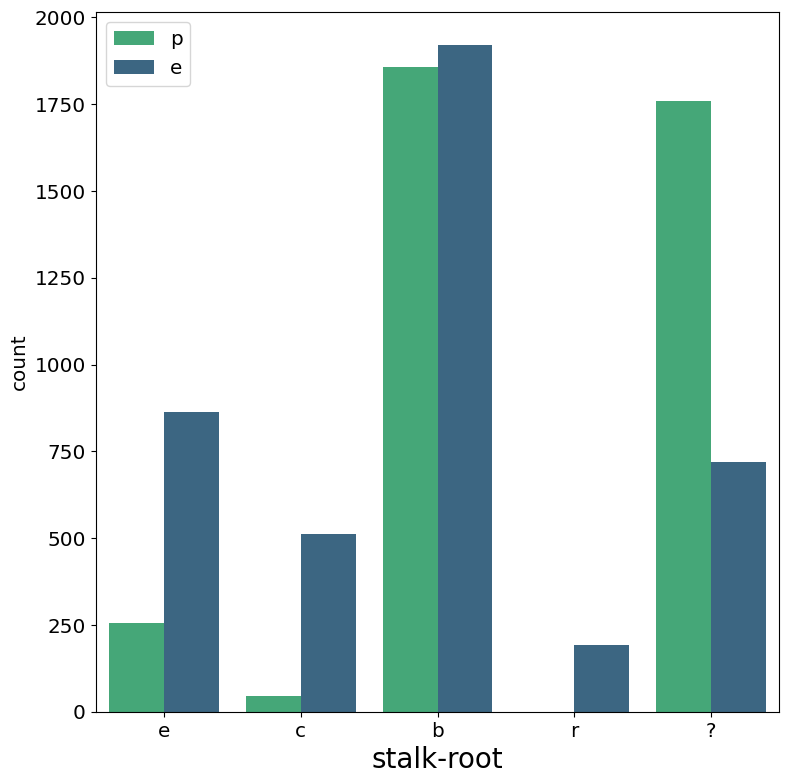

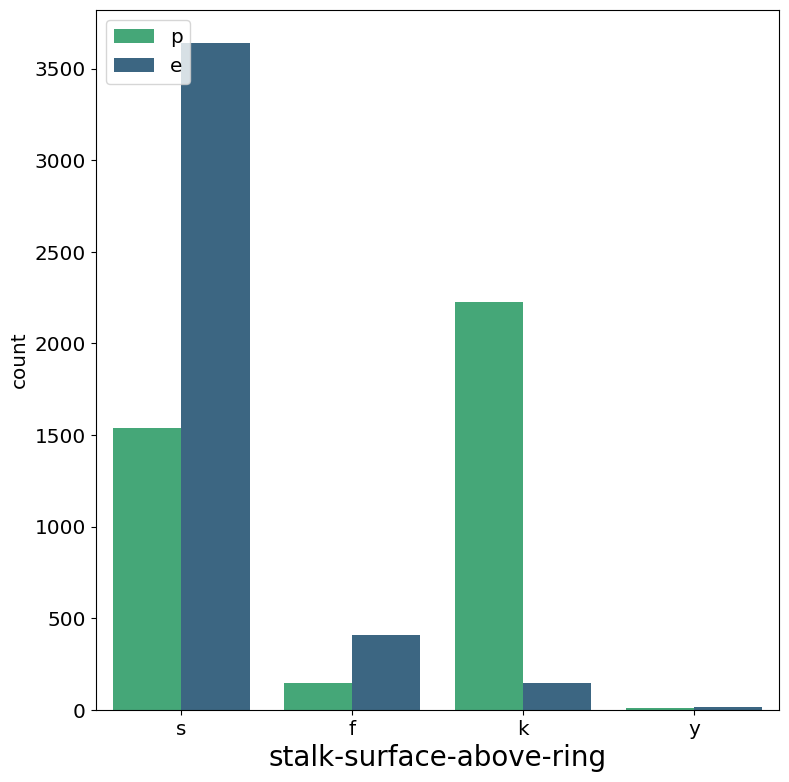

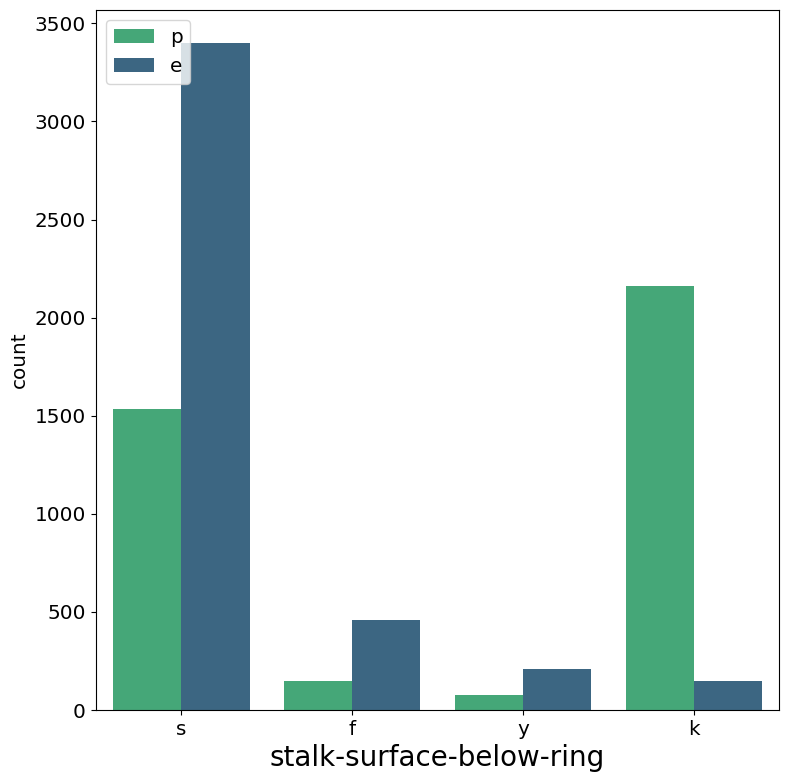

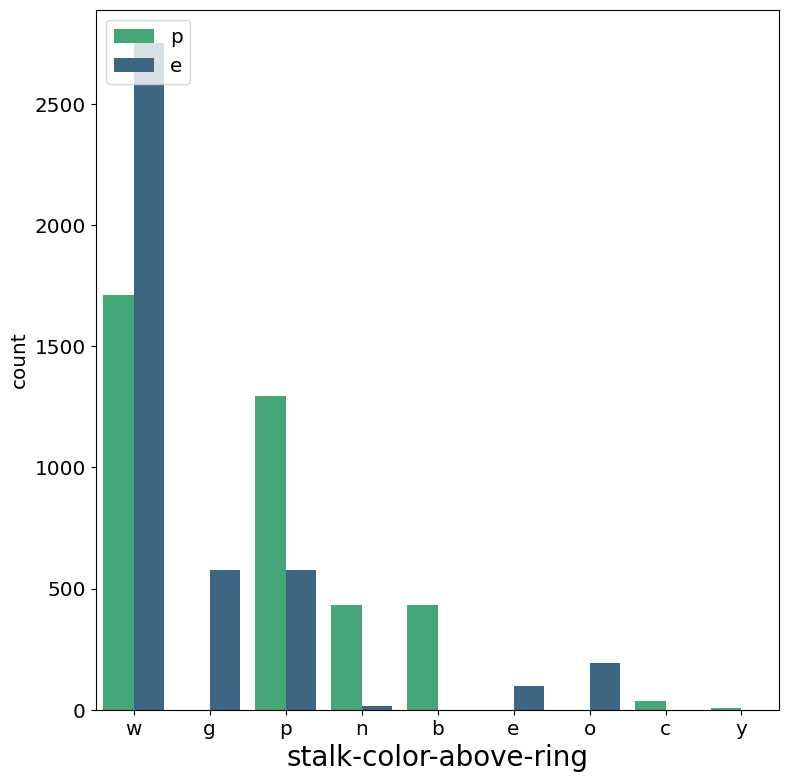

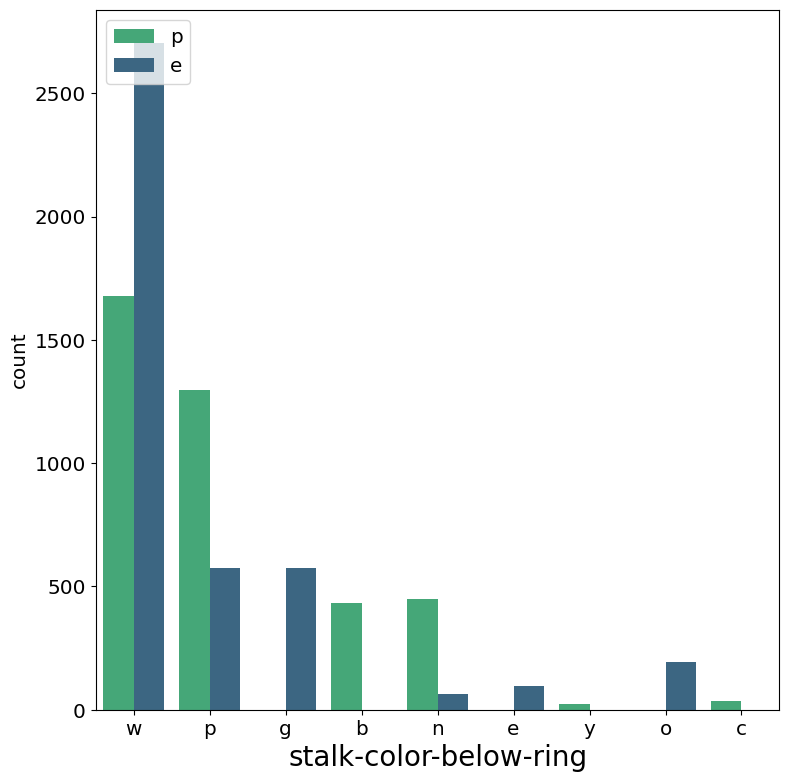

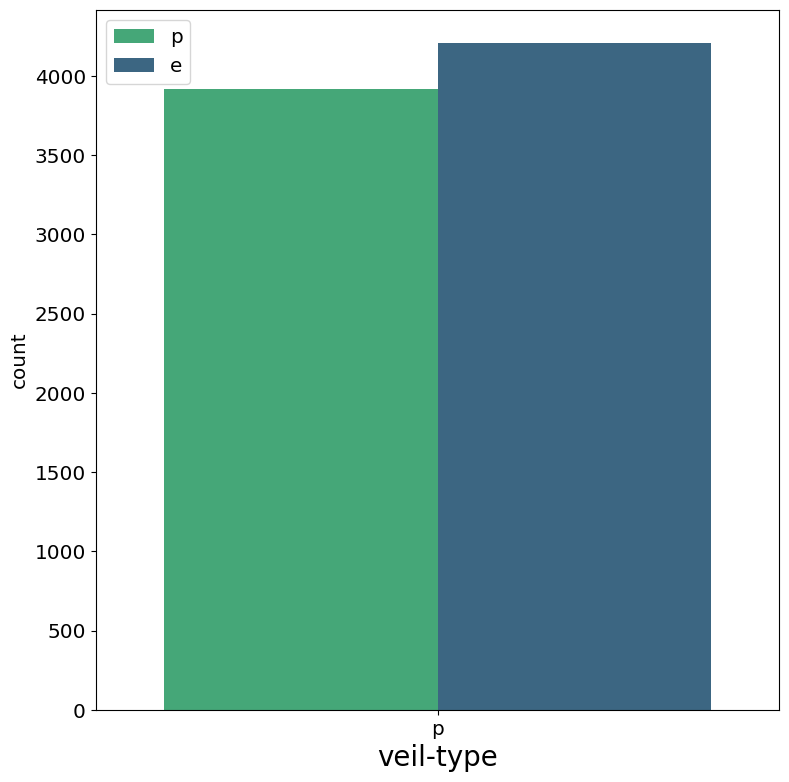

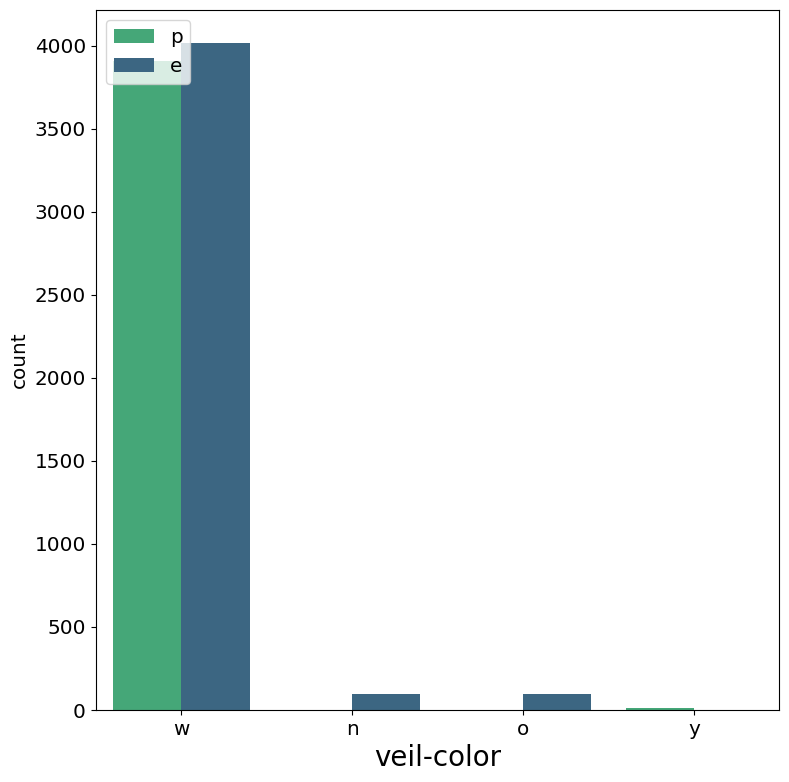

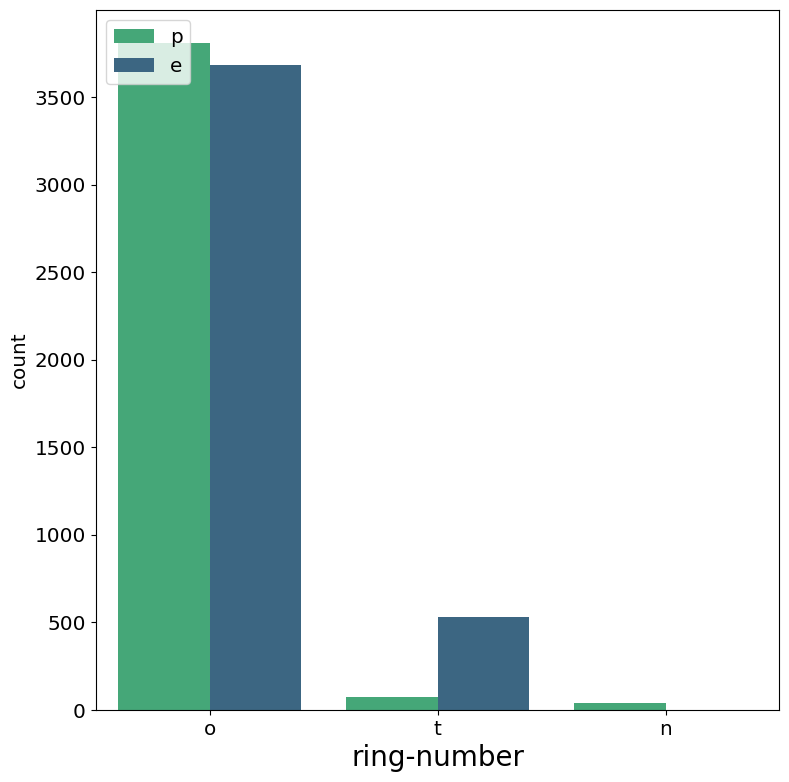

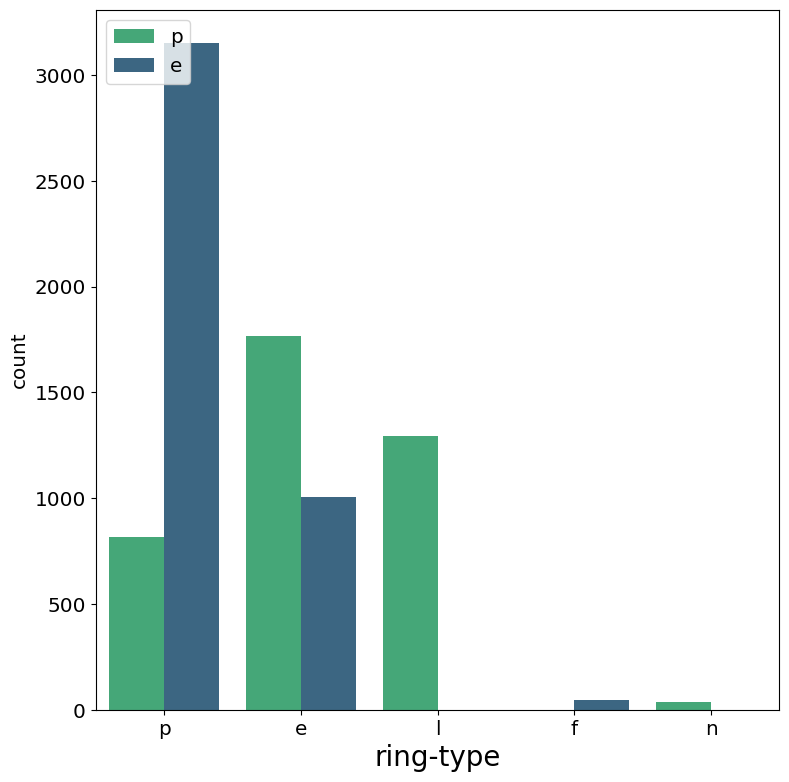

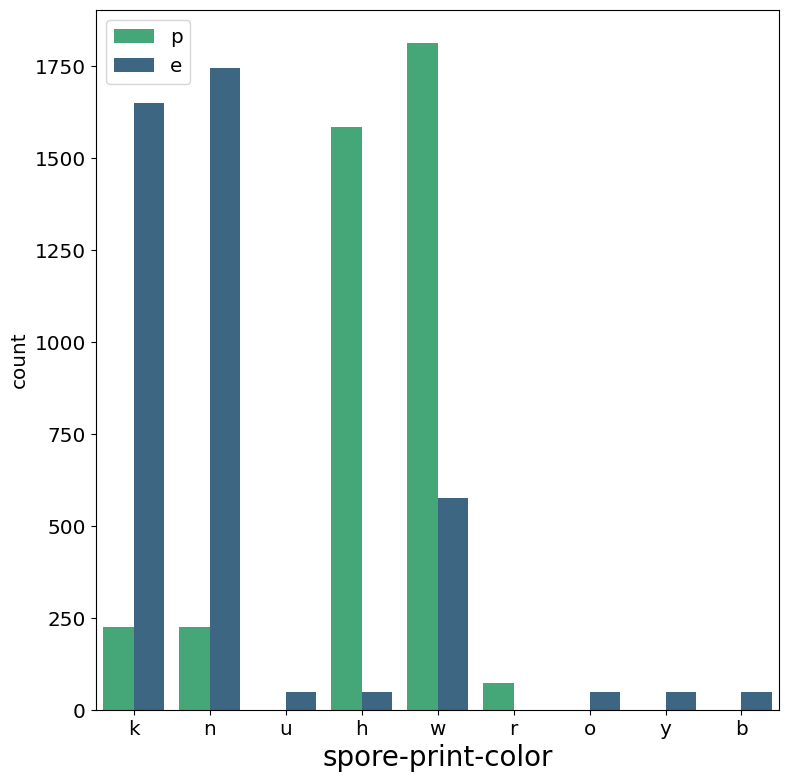

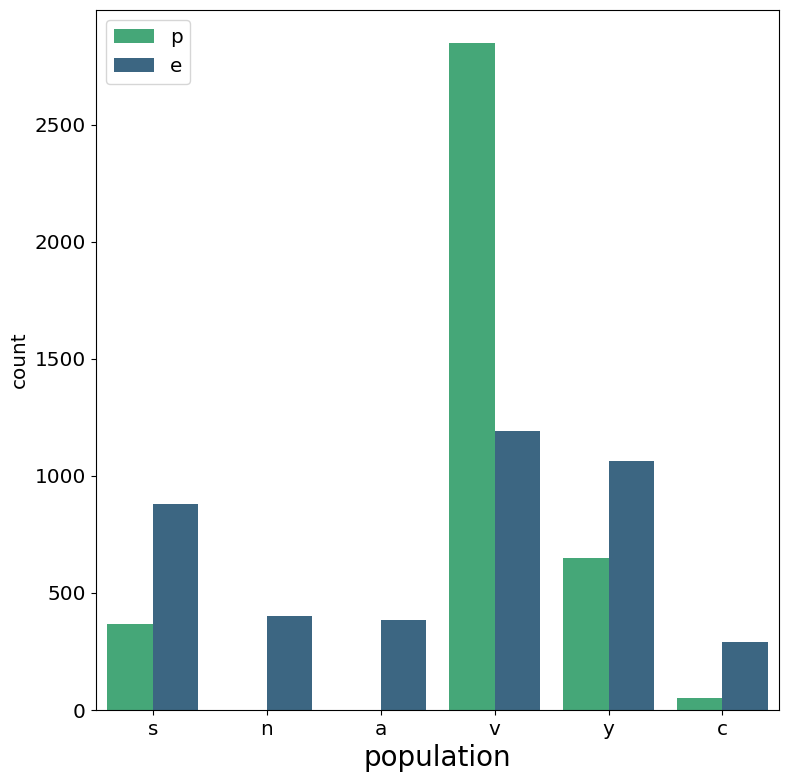

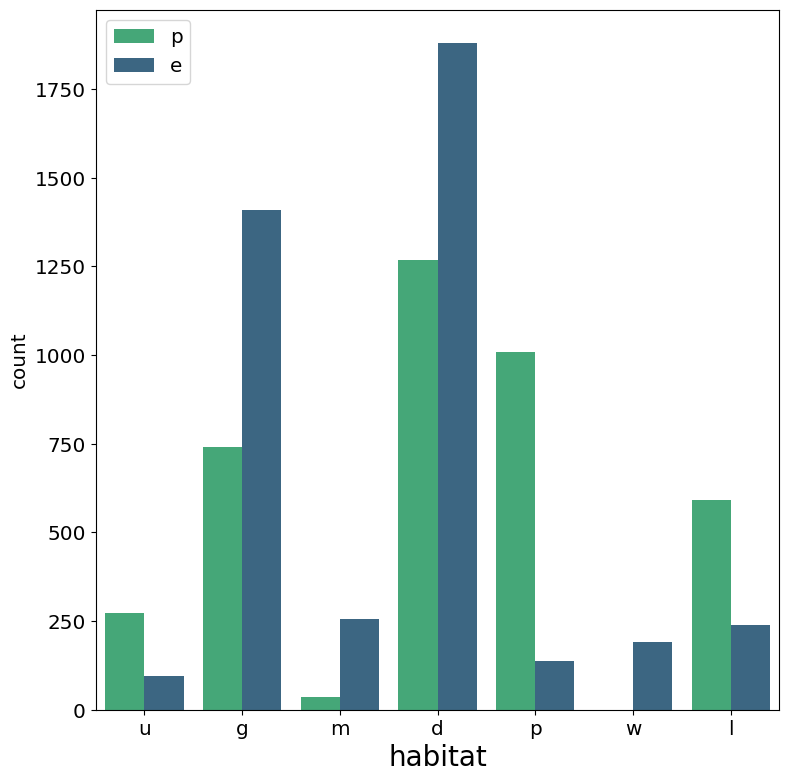

In [ ]:
for col in M_cols[1:]:
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='class', data=df ,palette='viridis_r')
    plt.xlabel(col, fontsize=20)
    plt.legend(loc='upper left')

In [ ]:
def get_labels(order, a_dict):
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

In [ ]:
pop_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
hab_dict = {"grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w","woods":"d"}

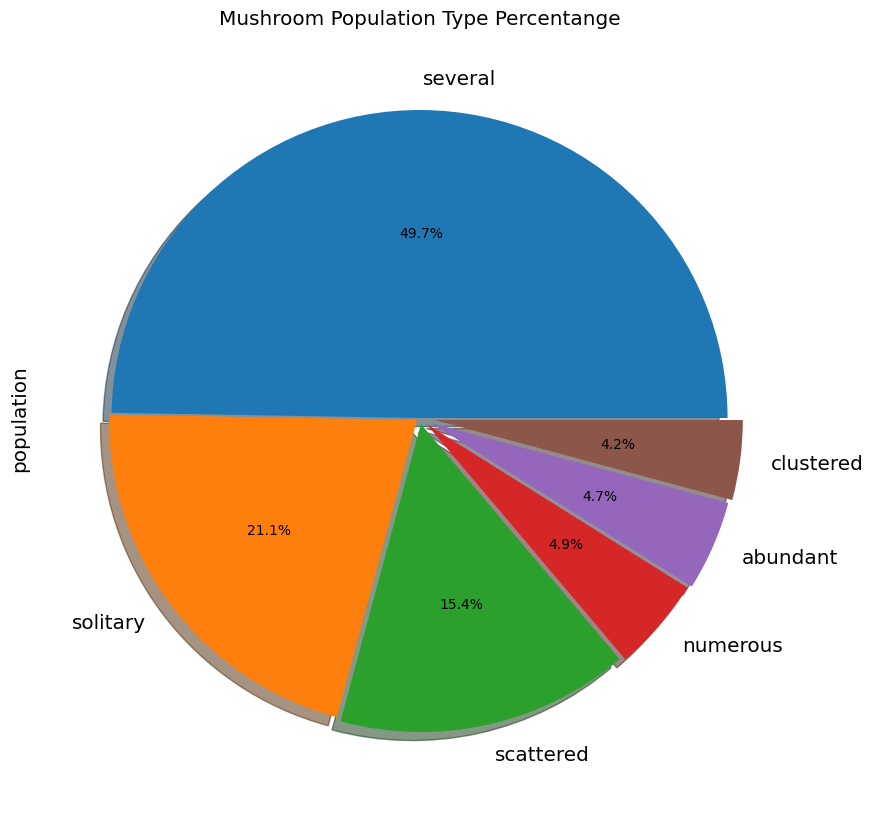

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(df['population'].value_counts().index)
pop_labels = get_labels(order, pop_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05)
df['population'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=pop_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Population Type Percentange');

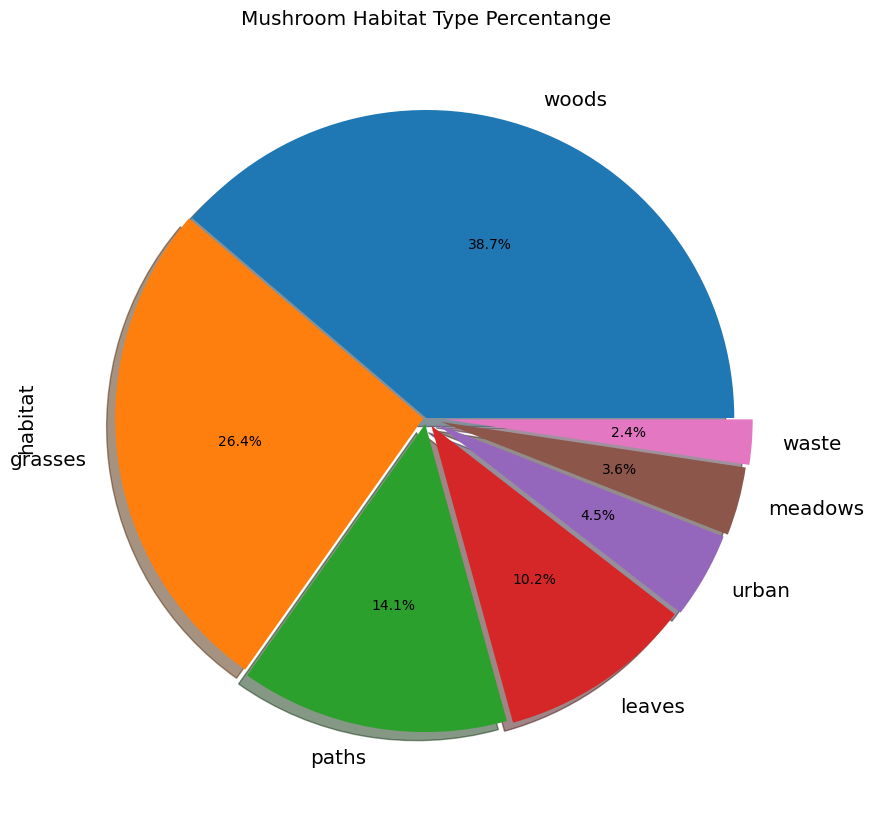

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(df['habitat'].value_counts().index)
hab_labels = get_labels(order, hab_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05, 0.06)
df['habitat'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=hab_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Habitat Type Percentange');

UNVARIATE PLOTS

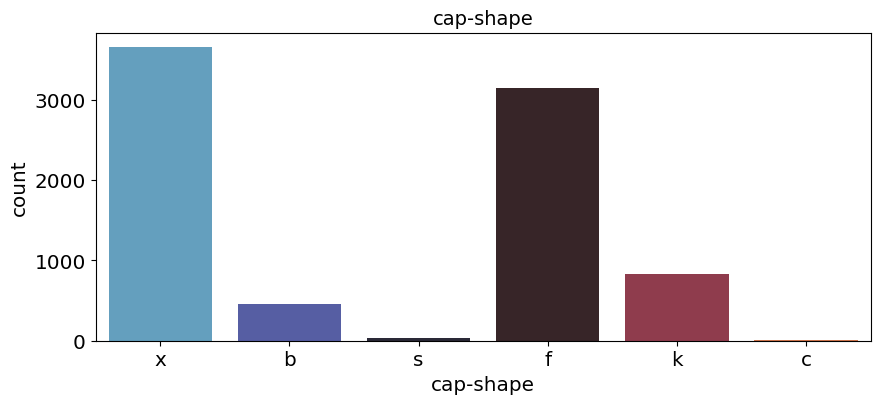

% of total:
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


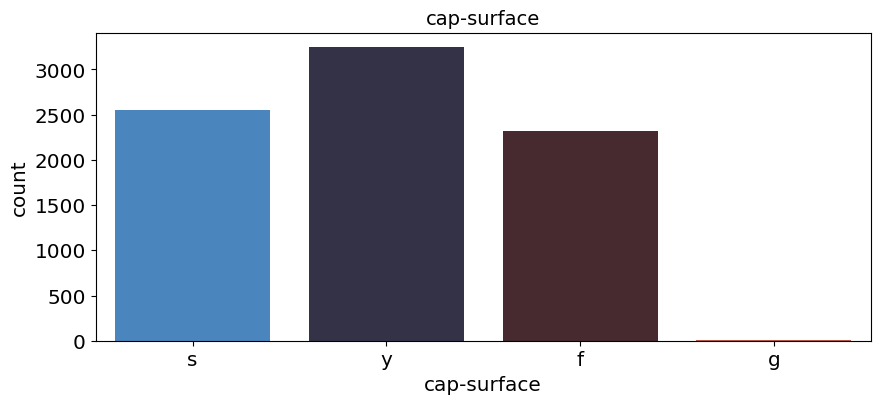

% of total:
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


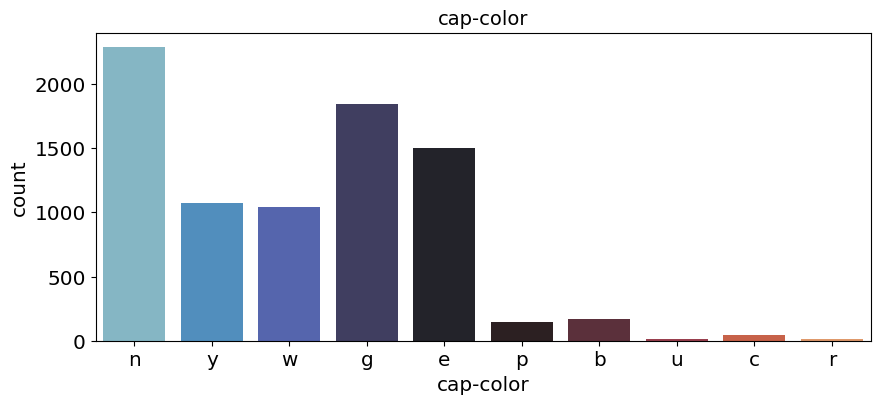

% of total:
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
u     0.20
r     0.20
Name: cap-color, dtype: float64


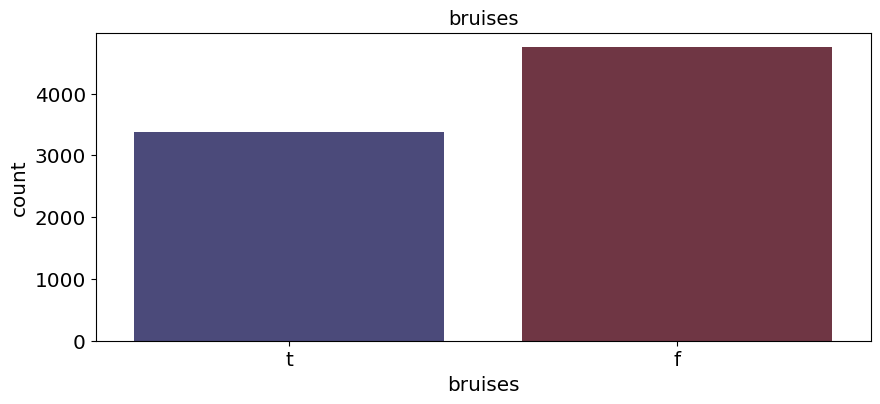

% of total:
f    58.44
t    41.56
Name: bruises, dtype: float64


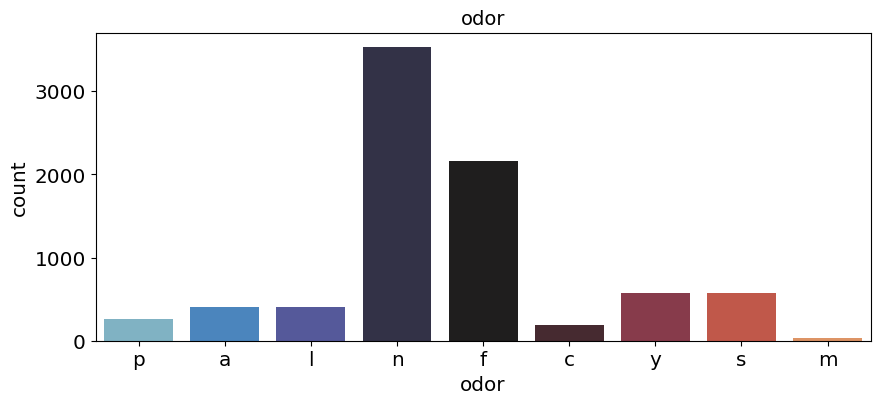

% of total:
n    43.43
f    26.59
y     7.09
s     7.09
a     4.92
l     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


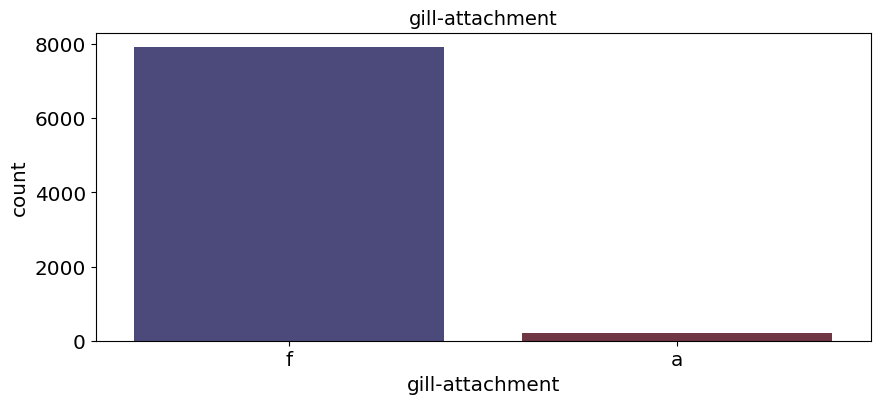

% of total:
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


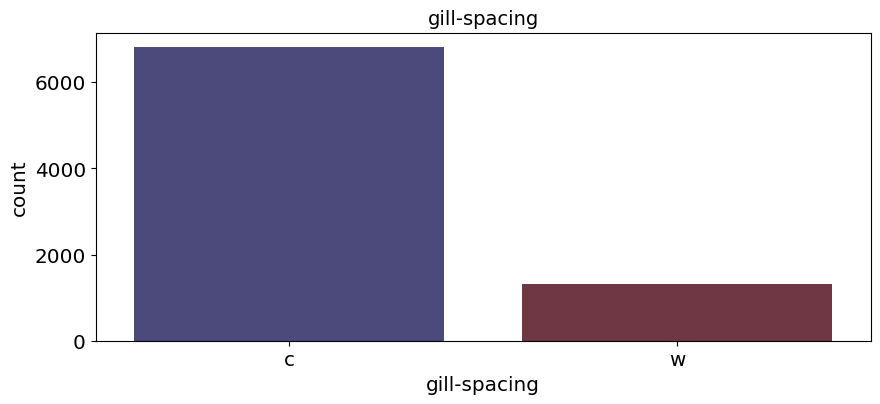

% of total:
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


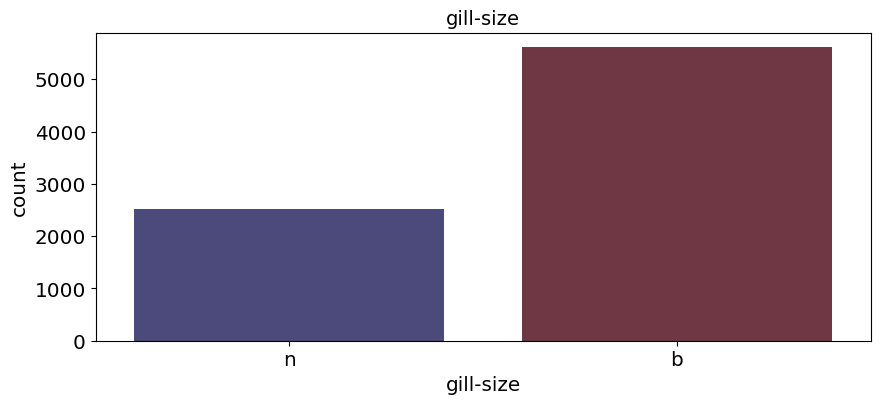

% of total:
b    69.08
n    30.92
Name: gill-size, dtype: float64


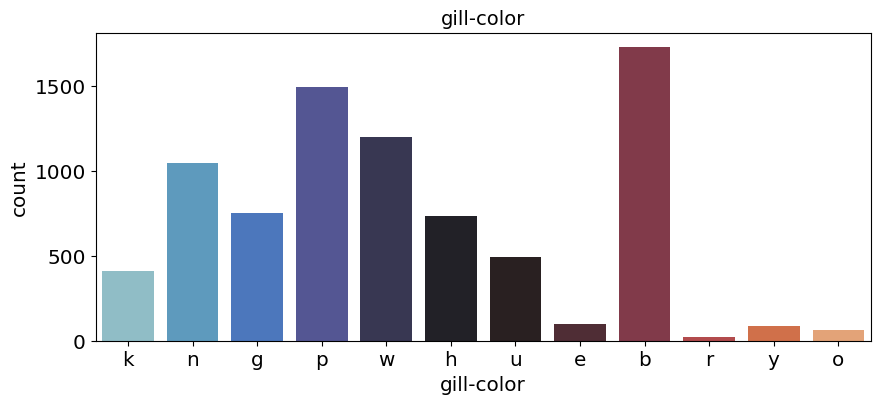

% of total:
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


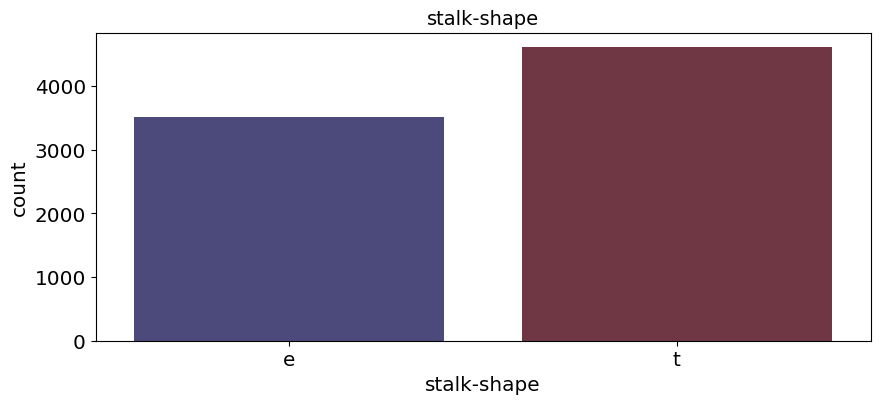

% of total:
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


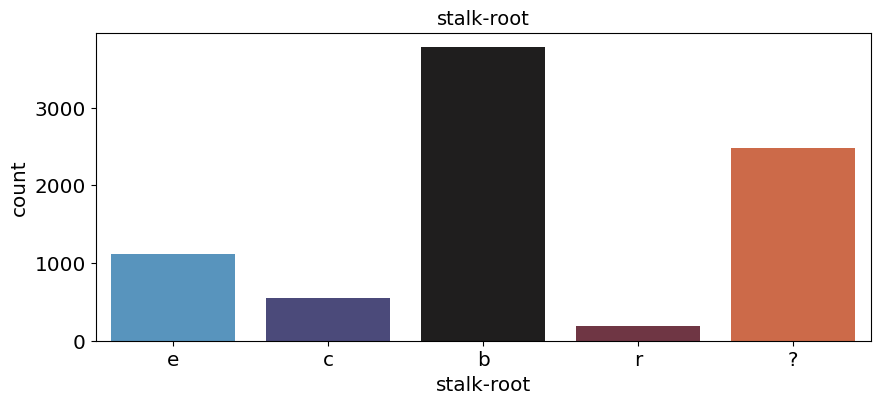

% of total:
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


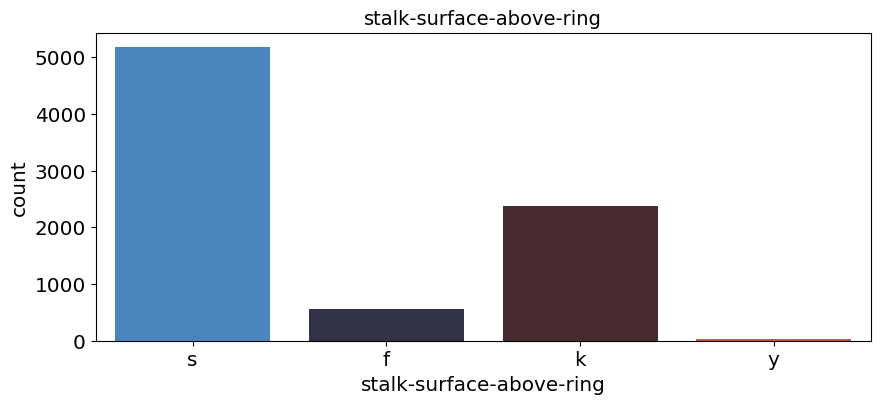

% of total:
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


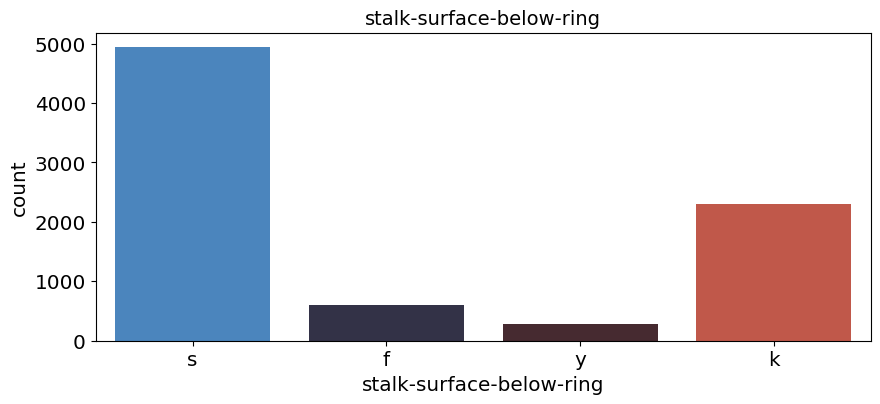

% of total:
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


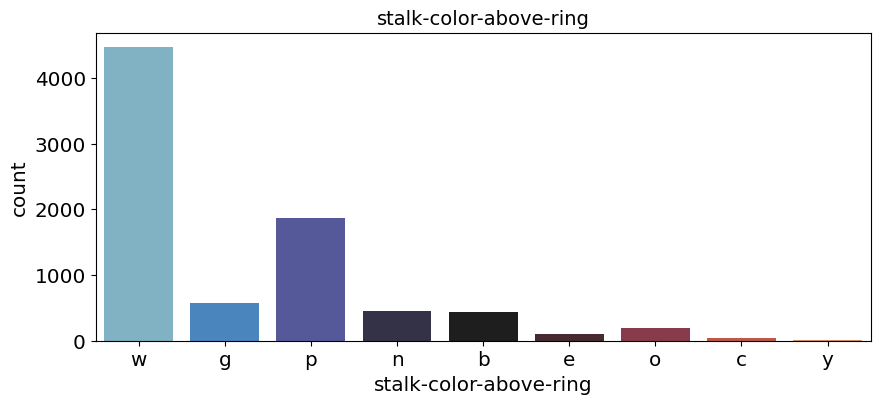

% of total:
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


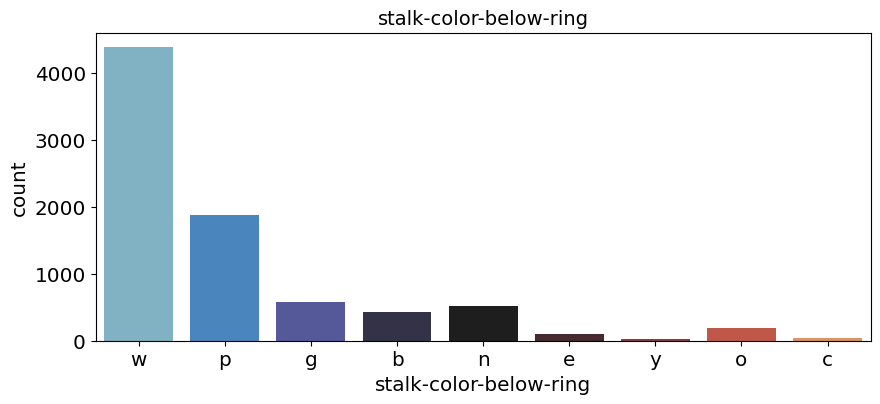

% of total:
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


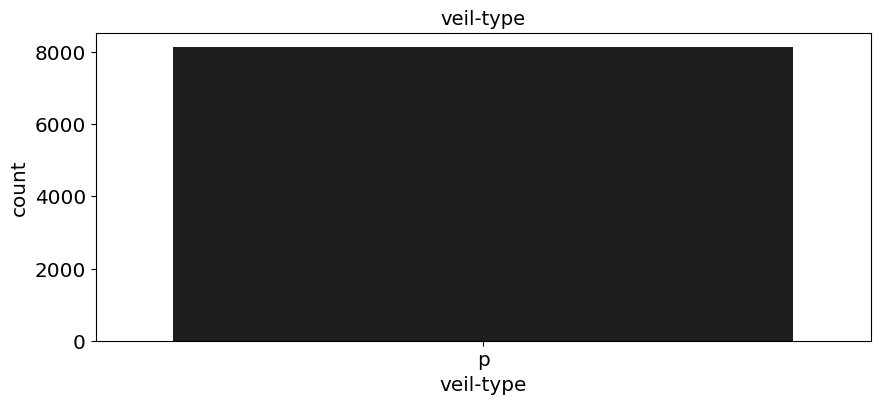

% of total:
p    100.0
Name: veil-type, dtype: float64


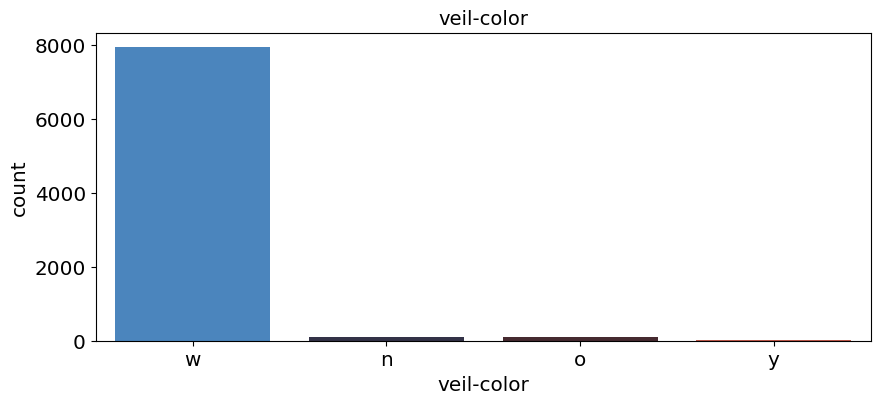

% of total:
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


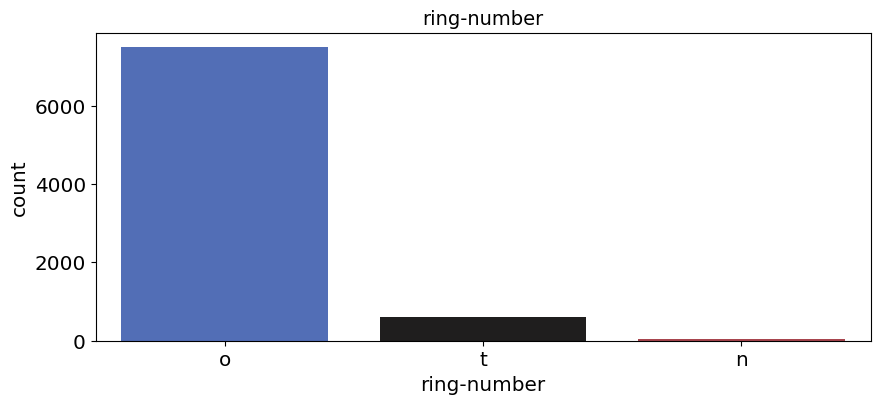

% of total:
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


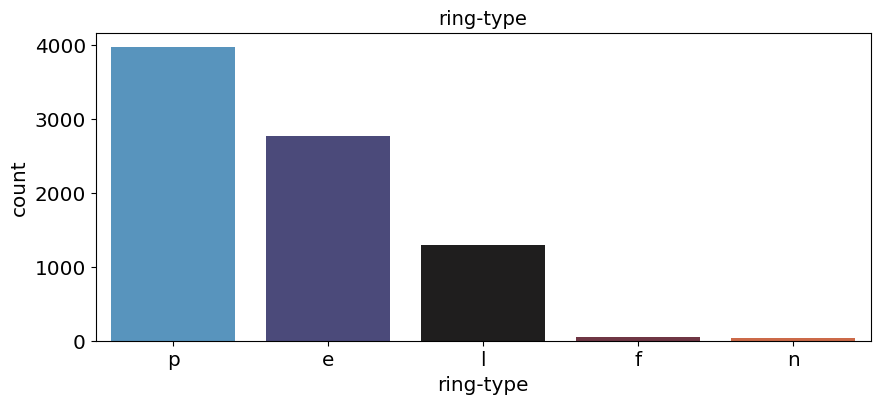

% of total:
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


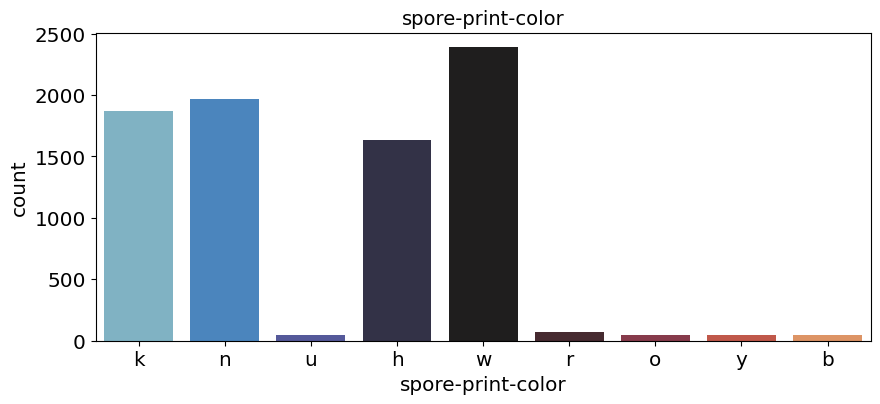

% of total:
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
u     0.59
o     0.59
y     0.59
b     0.59
Name: spore-print-color, dtype: float64


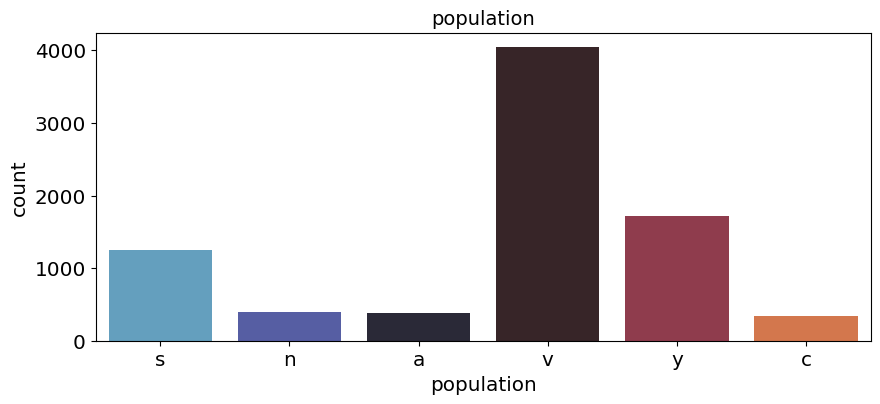

% of total:
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


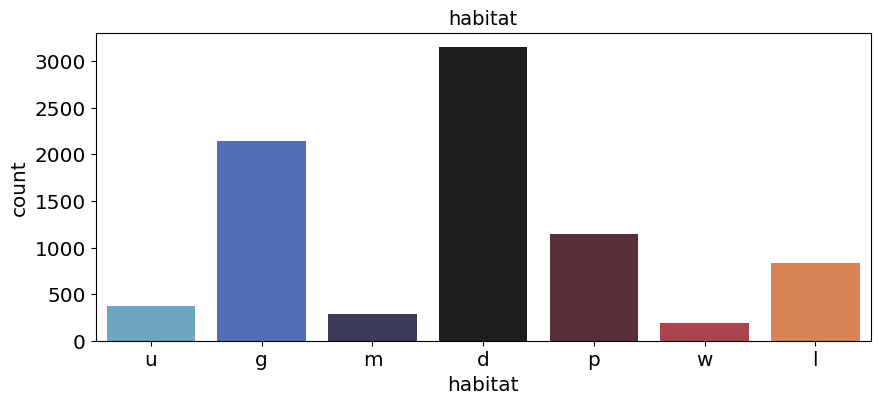

% of total:
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [ ]:
for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=df ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((df1[col].value_counts()/df1.shape[0]),4)*100)

CORRELATION BETWEEN CATEGORICAL VARIABLES USING CHI SQUARED TEST

In [ ]:
for col in df.columns:
    df[col] = df[col].astype('category').cat.codes
p_matrix = np.zeros((len(df.columns), len(df.columns)))
for i, var1 in enumerate(df.columns):
    for j, var2 in enumerate(df.columns):
        if i < j:
            cont_table = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, expected = chi2_contingency(cont_table)
            p_matrix[i, j] = p



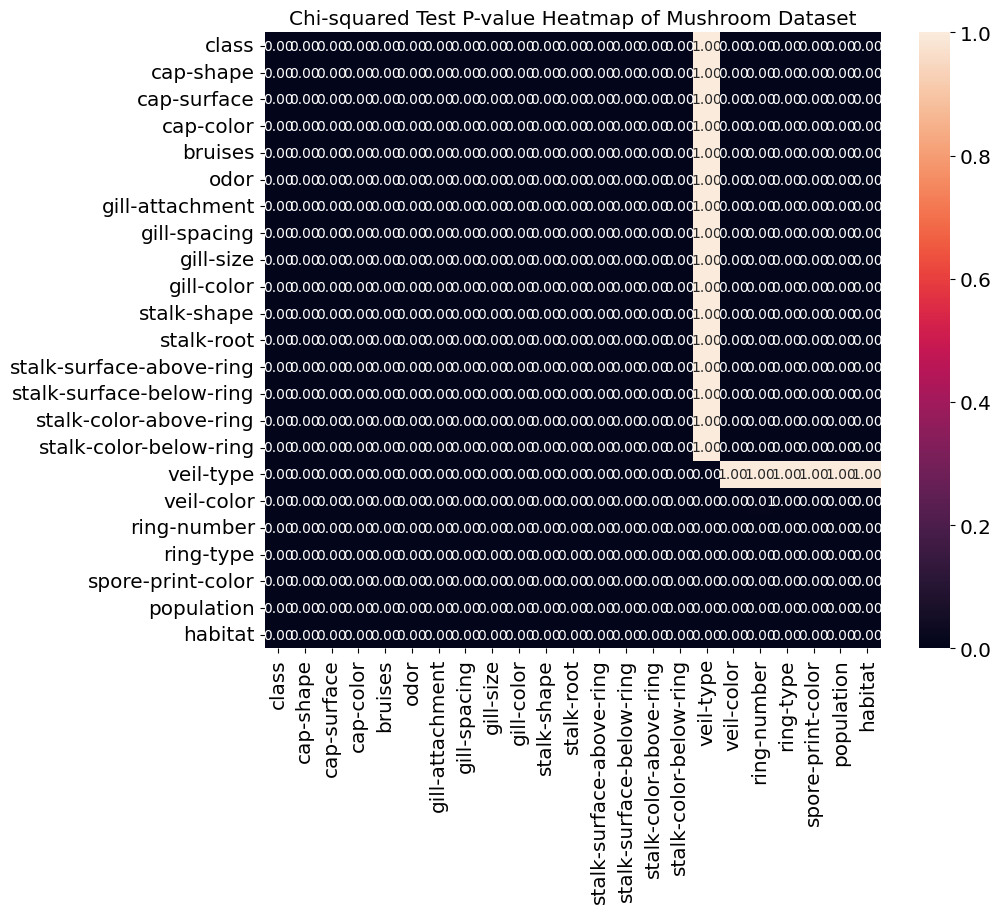

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(p_matrix, annot=True,square=True,xticklabels=df.columns,yticklabels=df.columns,fmt=".2f")
plt.title('Chi-squared Test P-value Heatmap of Mushroom Dataset')
plt.show()

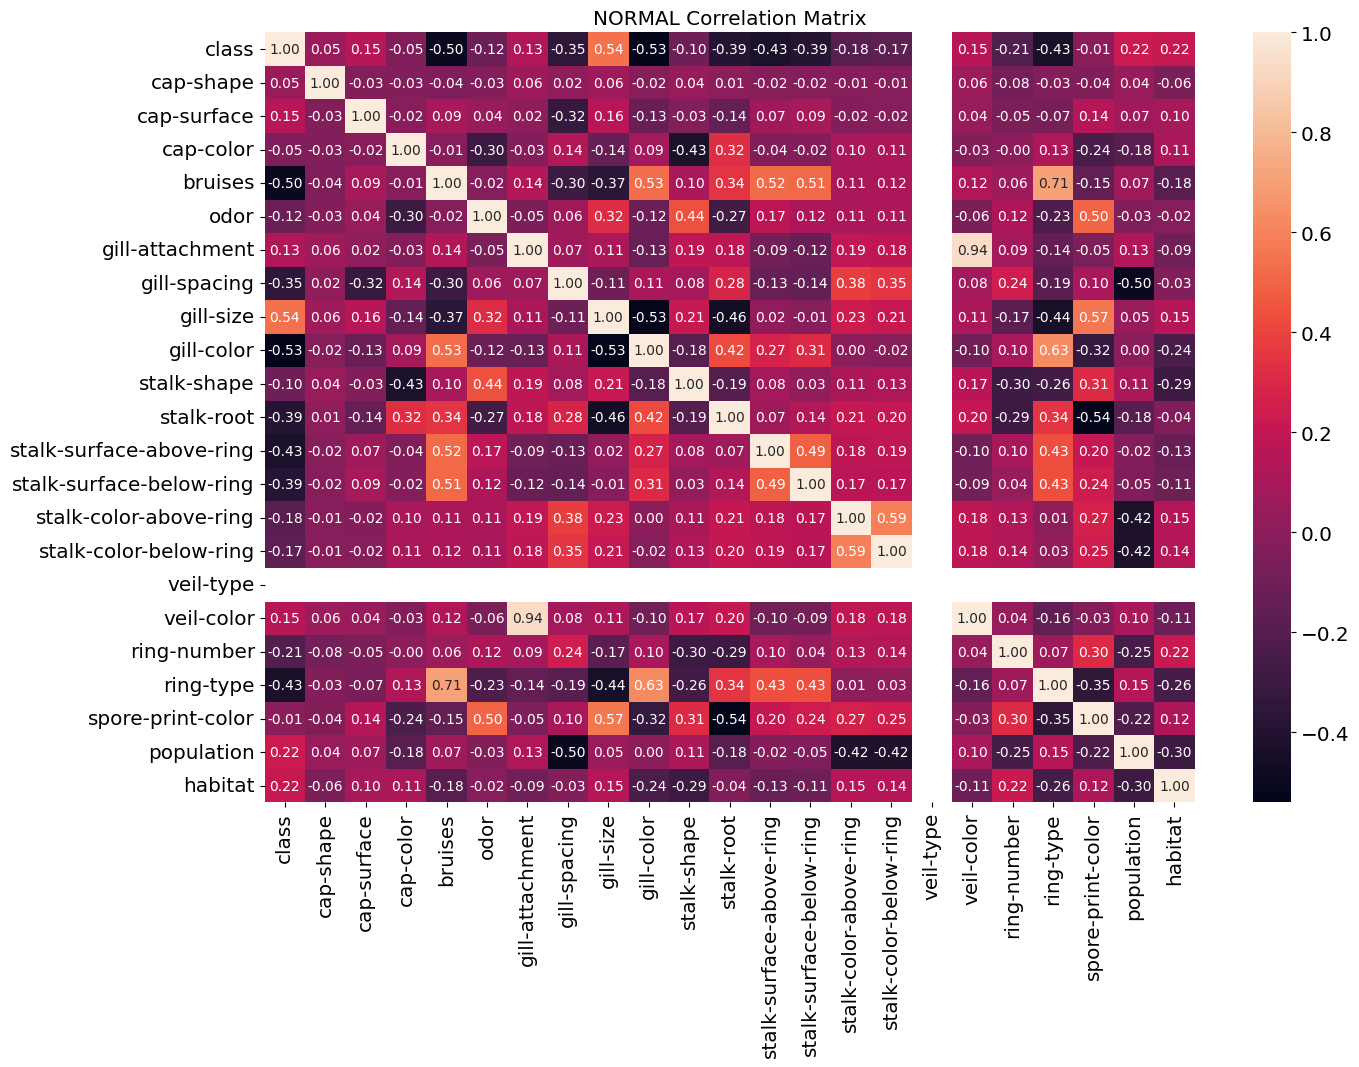

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='spearman').astype(float), annot=True,fmt=".2f")
plt.title("NORMAL Correlation Matrix")
plt.show()

In [ ]:
df.drop('veil-type',inplace=True,axis=1)
df = df[df['stalk-root'] != '?']
df.describe().T


,count,mean,std,min,25%,50%,75%,max
class,8124.0,0.482029,0.499708,0.0,0.0,0.0,1.0,1.0
cap-shape,8124.0,3.348104,1.604329,0.0,2.0,3.0,5.0,5.0
cap-surface,8124.0,1.827671,1.229873,0.0,0.0,2.0,3.0,3.0
cap-color,8124.0,4.504677,2.545821,0.0,3.0,4.0,8.0,9.0
bruises,8124.0,0.415559,0.492848,0.0,0.0,0.0,1.0,1.0
odor,8124.0,4.144756,2.103729,0.0,2.0,5.0,5.0,8.0
gill-attachment,8124.0,0.974151,0.158695,0.0,1.0,1.0,1.0,1.0
gill-spacing,8124.0,0.161497,0.368011,0.0,0.0,0.0,0.0,1.0
gill-size,8124.0,0.309207,0.462195,0.0,0.0,0.0,1.0,1.0
gill-color,8124.0,4.810684,3.540359,0.0,2.0,5.0,7.0,11.0


CORRELATION BETWEEN CATEGORICAL VARIABLES USING CRAMER'S V RULE

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        corr_matrix.iloc[i, j] = cramers_v(df.iloc[:, j], df.iloc[:, i])

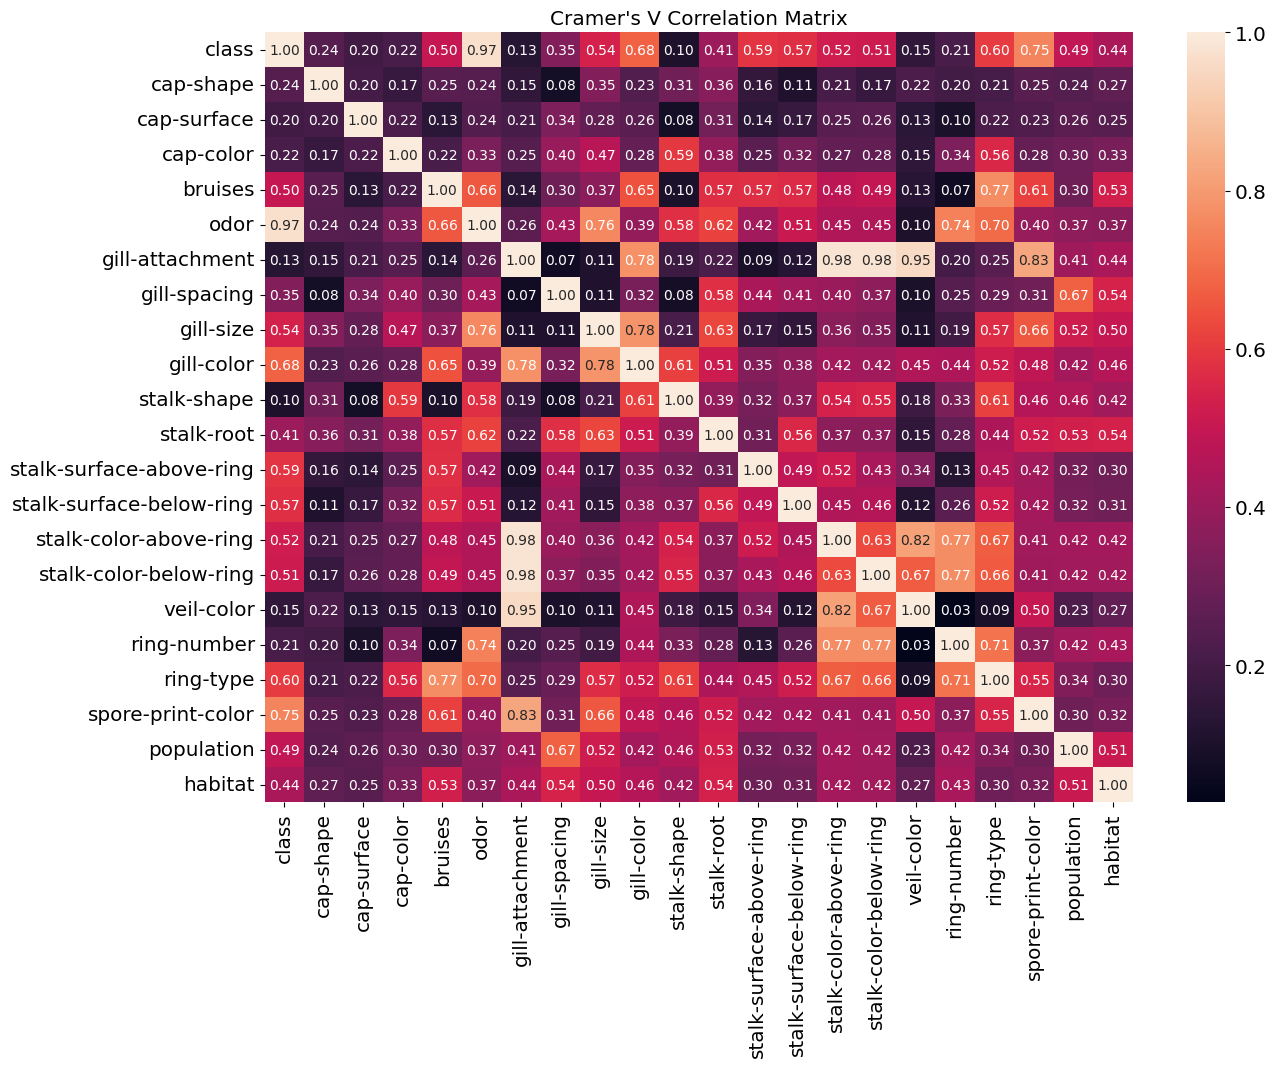

In [ ]:

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix.astype(float), annot=True,fmt=".2f")
plt.title("Cramer's V Correlation Matrix")
plt.show()

In [ ]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


In [ ]:
corr_matrix1 = pd.DataFrame(index=df.columns, columns=df.columns)
for i in range(len(df.columns)):
    for j in range(len(df.columns)):
        corr_matrix1.iloc[i, j] = theil_u(df.iloc[:, j],df.iloc[:, i])

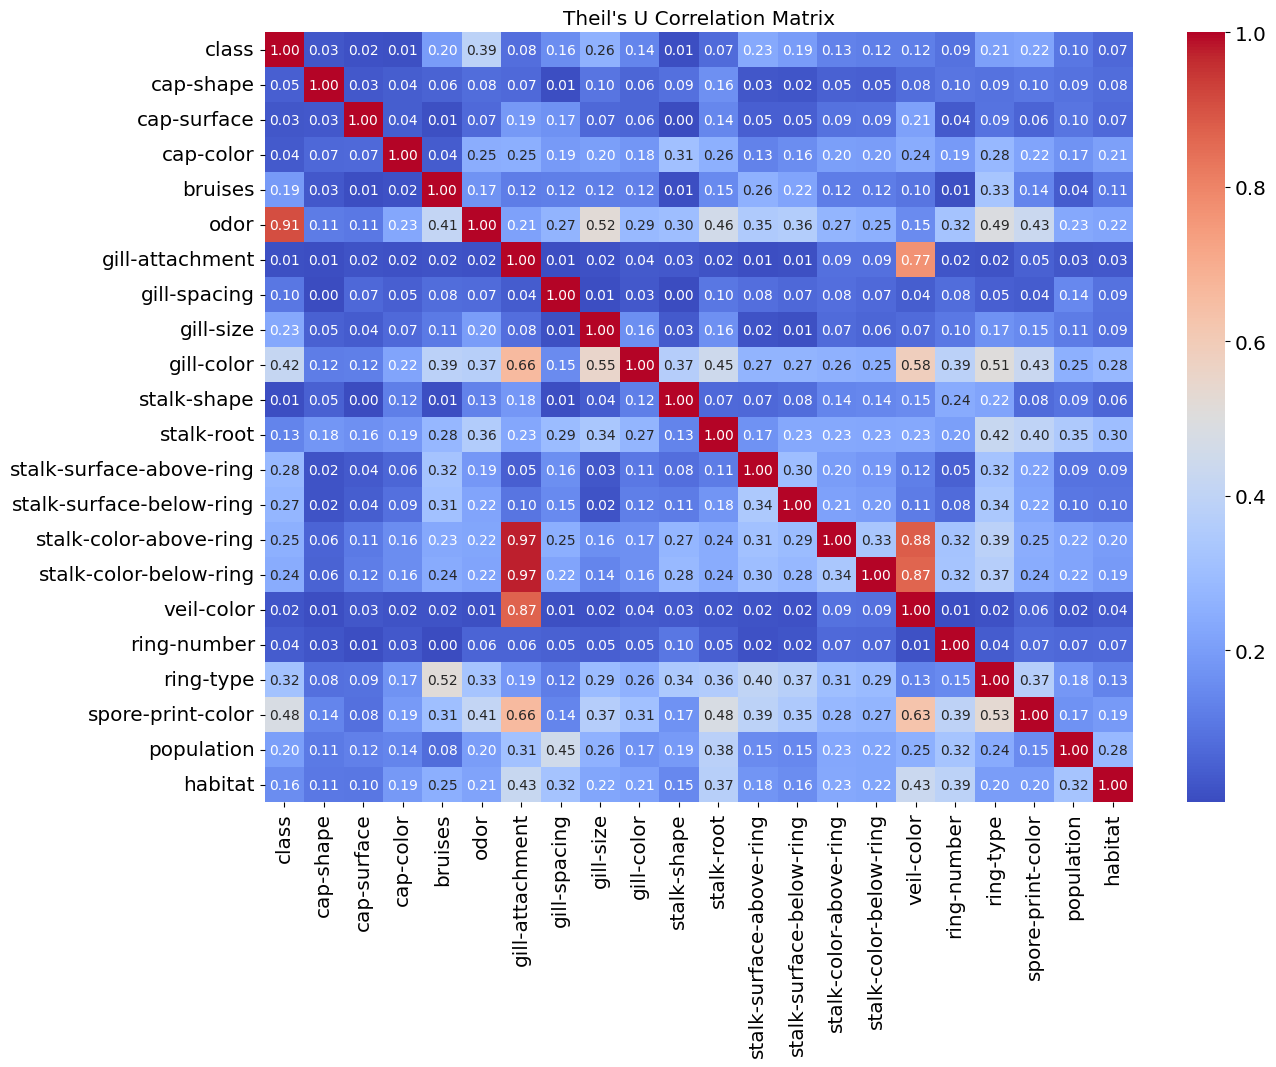

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix1.astype(float),cmap='coolwarm', annot=True,fmt=".2f")
plt.title("Theil's U Correlation Matrix")
plt.show()

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
features = df.iloc[:,1:]
features = pd.get_dummies(features)
target = df.iloc[:,0].replace({'p': 0, 'e': 1})
print('First 5 rows of new encoded feature columns:\n',features.head())
print('First 5 rows of new encoded target class of mushroom poisonous = 0 edible = 1:\n',target.head())
X = features.values
y = target.values

First 5 rows of new encoded feature columns:
    cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2                       7  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=29)
target_names = ['poisonous', 'edible']
print ('X_train Shape:', X_train.shape)
print ('X_test Shape:', X_test.shape)
print ('y_train Shape:', y_train.shape)
print ('y_test Shape:', y_test.shape)

X_train Shape: (5686, 21)
X_test Shape: (2438, 21)
y_train Shape: (5686,)
y_test Shape: (2438,)


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.4 MB/s eta 0:00:00


MODEL 1(USING CATBOOST CLASSIFIER)

In [ ]:
import catboost as cbt

In [ ]:
from catboost import CatBoostClassifier, Pool
#catboost model, use_best_model params will make the model prevent overfitting
catboost = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True)
catboost.fit(X_train,y_train,use_best_model=True,eval_set=(X_test,y_test),verbose=False)
catboost_predict = catboost.predict(X_test)
print("Catboost confusion matrix: \n",confusion_matrix(y_test, catboost_predict))
print("Catboost classification report: \n",classification_report(y_test,catboost_predict,target_names=target_names))

Catboost confusion matrix: 
 [[1237    0]
 [   0 1201]]
Catboost classification report: 
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00      1237
      edible       1.00      1.00      1.00      1201

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



MODEL-2(USING DECISION TREE CLASSIFIER)


Decision tree confusion matrix: 
 [[1174   63]
 [  41 1160]]

Decision tree classification report: 
               precision    recall  f1-score   support

   poisonous       0.97      0.95      0.96      1237
      edible       0.95      0.97      0.96      1201

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

0.9573420836751435


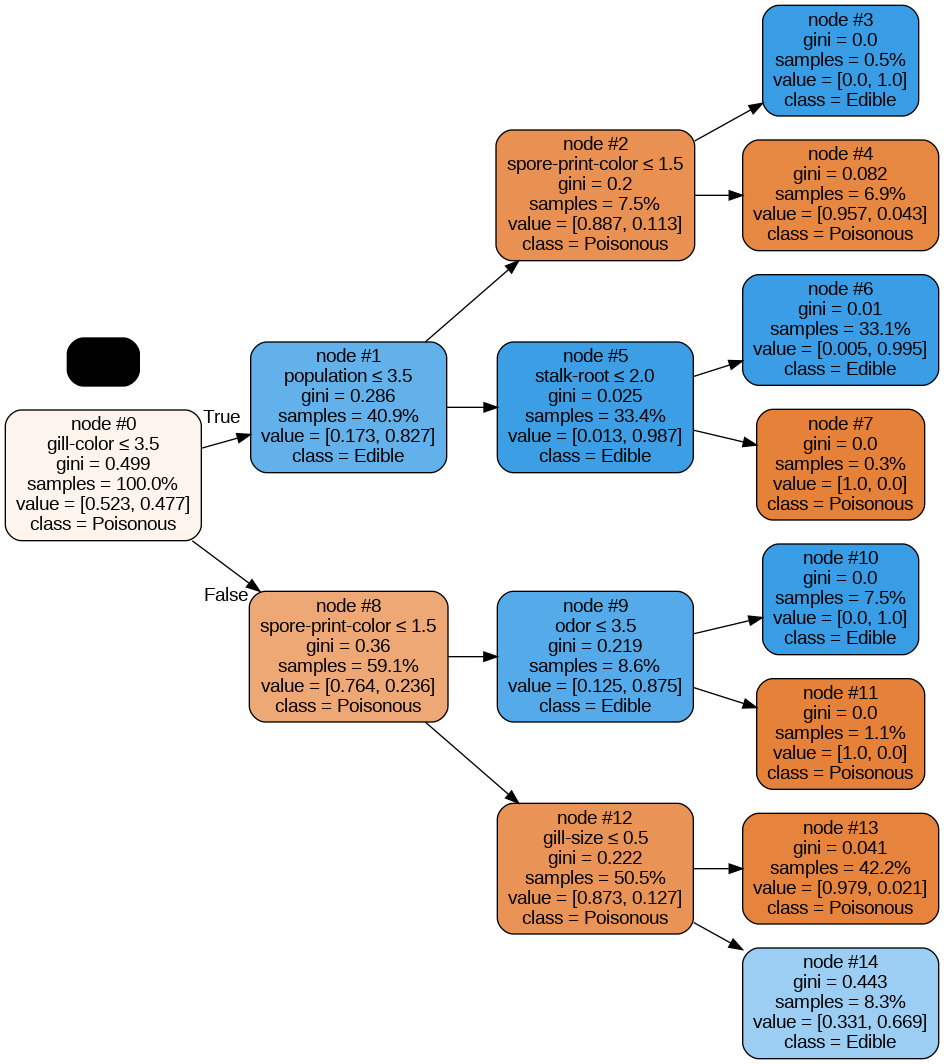

In [ ]:
#calling the decision tree classifier from sklearn and graphiz for visuals
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
# setting the classifier parameters
dtree = tree.DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
dtree_predict = dtree.predict(X_test)
#report the results
print("\nDecision tree confusion matrix: \n",confusion_matrix(y_test, dtree_predict))
print("\nDecision tree classification report: \n",classification_report(y_test,dtree_predict,target_names=target_names))
#test
print(accuracy_score(y_test,dtree_predict))
#raw_score
dtree_viz = export_graphviz(dtree, out_file=None,
                         feature_names=features.columns,
                         filled=True, rounded=True,
                         special_characters=True,
                         impurity=True,proportion=True,
                         rotate=True,node_ids=True,
                         class_names=['Poisonous','Edible'])
import pydotplus #convert graphviz viz from svg to png
# Draw graph
graph = pydotplus.graph_from_dot_data(dtree_viz)
from IPython.display import Image
# Show graph as png since it default output it as svg
Image(graph.create_png())

MODEL-3(USING SCIKIT-LEARN IMPLEMENTATION USING MLP CLASSIFIER.)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,),
                    activation='logistic',
                    max_iter=10,
                    solver='adam',
                    verbose=True)
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
print("\nMLP confusion matrix: \n",confusion_matrix(y_test, mlp_predict))
print("\nMLP classification report: \n",classification_report(y_test,mlp_predict))

Iteration 1, loss = 0.66749261
Iteration 2, loss = 0.59063351
Iteration 3, loss = 0.52401455
Iteration 4, loss = 0.46589143
Iteration 5, loss = 0.41764218
Iteration 6, loss = 0.38180354
Iteration 7, loss = 0.35375317
Iteration 8, loss = 0.33171529
Iteration 9, loss = 0.31402126
Iteration 10, loss = 0.29831869

MLP confusion matrix: 
 [[1162   75]
 [ 207  994]]

MLP classification report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      1237
           1       0.93      0.83      0.88      1201

    accuracy                           0.88      2438
   macro avg       0.89      0.88      0.88      2438
weighted avg       0.89      0.88      0.88      2438



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from tensorflow import keras
model = keras.Sequential([keras.layers.Dense(50, input_shape=(97,)),
                          keras.layers.Dense(2, activation='sigmoid')])
# model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.fit(X_train, y_train,epochs=5, verbose=1)
keras_pred = model.predict_classes(X_test)
# keras_pred = np.argmax(keras_pred, axis=1)
print('\nKeras confusion matrix:\n',confusion_matrix(keras_pred, y_test))
print('\nKeras classification Report:\n',classification_report(keras_pred, y_test,target_names=target_names))

Epoch 1/5


ValueError: ignored